Centro de Serviços Medicare e Medicaid (CMS), dados de reivindicações do Medicare
Metadados atualizados: 10 de abril de 2024

2016–2021. O CMS compila dados de sinistros de pacientes do Medicare e Medicaid em diversas categorias e anos. Isso inclui solicitações de pacientes internados e ambulatoriais, arquivos de resumo de beneficiários principais e muitos outros arquivos. Os indicadores desta fonte de dados foram calculados por pessoal da Divisão de Prevenção de Doenças Cardíacas e AVC (DHDSP) do CDC. Este foi um dos conjuntos de dados fornecidos pelo Sistema Nacional de Vigilância de Doenças Cardiovasculares e apresentado na ferramenta online Dados, Tendências e Mapas do DHDSP. Esta ferramenta foi descontinuada em abril de 2024 e este conjunto de dados não será atualizado. Contate dhdsprequests@cdc.gov se precisar de assistência com dados incluídos anteriormente neste conjunto de dados. Os dados estão organizados por localidade (nacional e estadual) e indicador. Os dados podem ser representados como tendências e estratificados por sexo e raça/etnia.

#**Extração dos dados**

In [30]:
# Bibliotecas

# tratamentos de dados
from google.colab import drive
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None) # para poder visualizar todas colunas

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
# usar esse comando para não precisar dar plt.show em cada gráfico
%matplotlib inline


# modelos
from sklearn.model_selection import train_test_split # para separar treino e teste
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler,LabelEncoder # Normalizando os dados

from sklearn.metrics import classification_report, accuracy_score # metricas


# Modelos de classificação
from sklearn.linear_model import LogisticRegression # regressão logistica
from sklearn.ensemble import RandomForestClassifier # floresta
from sklearn.neural_network import MLPClassifier # Redes Neurais (Neural Networks)
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (KNN)
from sklearn.tree import DecisionTreeClassifier # Arvore de decisão

In [31]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
link = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/1_semestre/avaliacao_de_desenpenho_de_sistemas_computacionais/trabalho_final/dados_em_csv/Center_for_Medicare___Medicaid_Services__CMS____Medicare_Claims_data.csv'

In [33]:
df = pd.read_csv(link)

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Verificando Dataset

In [35]:
df.shape

(33454, 30)

In [36]:
df.head(2)

,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
0,NaN,2016,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2367.6,2367.6,NaN,NaN,2318.3,2417.9,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
1,NaN,2017,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2403.7,2403.7,NaN,NaN,2358.1,2450.2,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN


# **Tratamento dos dados**

- limpeza
- verificação

*Colunas Ordinais*
- Tipo_valor_de_dados: Embora "Crude" e outros possíveis valores não tenham sido especificados, eles podem ser tratados como ordinais se representarem uma ordenação específica.

*Colunas Nominais*
- Localização_Abbr: Códigos de abreviação dos locais.
- Localização_Desc: Descrições dos locais.
- Fonte_de_dados: Fonte dos dados, como Medicare.
- Classe: Classe de doenças.
- Topico: Tópico de doenças.
- Questao: Questão ou indicador específico.
- Break_Out_Categoria: Categoria de detalhamento, como "Race".
- Break_Out: Detalhamento específico, como "Unknown".
- Classe_ID: Identificador de classe.
- ID_do_topico: Identificador do tópico.
- Questao_ID: Identificador da questão.
- Tipo_de_valor_de_dados_ID: Identificador do tipo de valor de dados.
- Break_Out_Categoria_ID: Identificador da categoria de detalhamento.
- Break_Out_Id: Identificador do detalhamento.
- ID_de_local: Identificador do local.
- Localização_geografica: Pode conter valores nominais de localização geográfica.

*Colunas Contínuas*
- Inicio_de_1_ano: Ano, considerado contínuo para fins de análise.
- Valor_dados_unitario: Unidade do valor dos dados.
- Valor_de_dados: Valor dos dados.
- Valor_dados_Alto: Valor alto dos dados.
- Limite_de_confiança_baixa: Limite de confiança baixo.
- Limite_de_alta_confianca: Limite de confiança alto.

Excluindo colunas com valores nulos

Motivo:\
Como as colunas não apresenta nenhum valor então não há necessidade de ter,\
caso se tivesse seria bom ter um tratamento para não perder a logica dos dados.




In [37]:
# excluindo colunas nulas
df.drop(df.columns[[0,5,6,7,8,16,17,]],axis=1, inplace=True) # exluindo coluna 0,5,6,7,8,16,17

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33454 entries, 0 to 33453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              33454 non-null  int64  
 1   LocationAbbr           33454 non-null  object 
 2   LocationDesc           33454 non-null  object 
 3   DataSource             33454 non-null  object 
 4   Class                  33454 non-null  object 
 5   Topic                  33454 non-null  object 
 6   Question               33454 non-null  object 
 7   Data_Value_Type        33454 non-null  object 
 8   Data_Value_Unit        33454 non-null  object 
 9   Data_Value             33454 non-null  float64
 10  Data_Value_Alt         33454 non-null  float64
 11  Low_Confidence_Limit   33454 non-null  float64
 12  High_Confidence_Limit  33454 non-null  float64
 13  Break_Out_Category     33454 non-null  object 
 14  Break_Out              33454 non-null  object 
 15  Cl

In [39]:
#_Renomando_coluna_para_fical_entendimento
colunas = [
'Inicio_de_1_ano','Localizacao_Abbr','Localizacao_Desc','Fonte_de_dados','Classe','Topico','Questao','Tipo_valor_de_dados','Valor_dados_unitario','Valor_de_dados',
'Valor_dados_Alto','Limite_de_confianca_baixa','Limite_de_alta_confianca','Break_Out_Categoria','Break_Out','Classe_ID','ID_do_topico','Questao_ID','Tipo_de_valor_de_dados_ID',
'Break_Out_Categoria_ID','Break_Out_Id','ID_de_local','Localizacao_geografica']

In [40]:
# renomando as colunas
df.columns = colunas

In [41]:
# quantidade de linhas e colunas

print(f'Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas')

Dataset tem 33454 linhas e 23 colunas


In [42]:
# Identificar colunas por tipo
ordinal_cols = ['Tipo_valor_de_dados']
nominal_cols = ['Localizacao_Abbr', 'Localizacao_Desc', 'Fonte_de_dados', 'Classe', 'Topico', 'Questao', 'Break_Out_Categoria', 'Break_Out', 'Classe_ID', 'ID_do_topico', 'Questao_ID', 'Tipo_de_valor_de_dados_ID', 'Break_Out_Categoria_ID', 'Break_Out_Id', 'ID_de_local', 'Localizacao_geografica']
continous_cols = ['Inicio_de_1_ano', 'Valor_dados_unitario', 'Valor_de_dados', 'Valor_dados_Alto', 'Limite_de_confianca_baixa', 'Limite_de_alta_confianca']

In [43]:
# novo dataframe
df_02 = df.copy()
transfor = LabelEncoder()


label_encoders = {}

for cols in nominal_cols:
  df_02[cols] = transfor.fit_transform(df_02[cols])
  #label_encoders = X_transformando

In [44]:
# exluindo coluna 'Tipo_valor_de_dados'	'Valor_dados_unitario' pois representa o mesmo valor e não tem importancia no ensaio.
df_02.drop(df_02[['Tipo_valor_de_dados',	'Valor_dados_unitario']],axis=1, inplace=True) # exluindo colunas

In [45]:
df_02.Classe_ID.unique()

array([0])

Text(0.5, 1.05, 'De acordo com este grafico vou excluir algumas colunas que não tem correlação pois elas são dados unicos.')

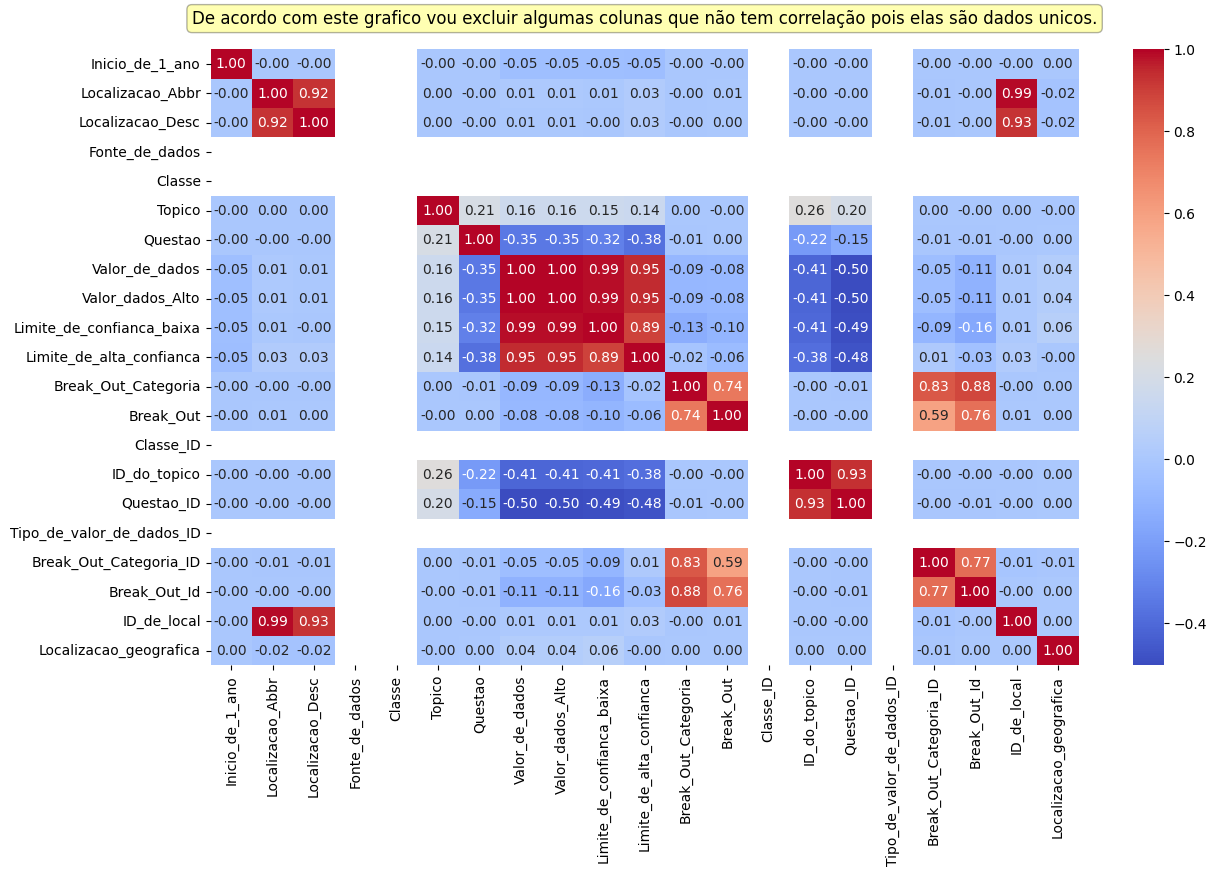

In [46]:
# Criar o heatmap com seaborn
ax = sns.heatmap(df_02.corr(), annot=True, fmt='.2f', cmap='coolwarm')

# Ajustar o tamanho da figura
ax.figure.set_size_inches(14, 8)

# Adicionando uma observação no gráfico
plt.annotate('De acordo com este grafico vou excluir algumas colunas que não tem correlação pois elas são dados unicos.', xy=(0.5, 0.95), xytext=(0.5, 1.05),
             xycoords='axes fraction', fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3))

In [47]:
# Excluindo colunas unicas
df_02.drop(df_02[['Fonte_de_dados',	'Classe','Classe_ID','Tipo_de_valor_de_dados_ID']],axis=1, inplace=True) # exluindo colunas

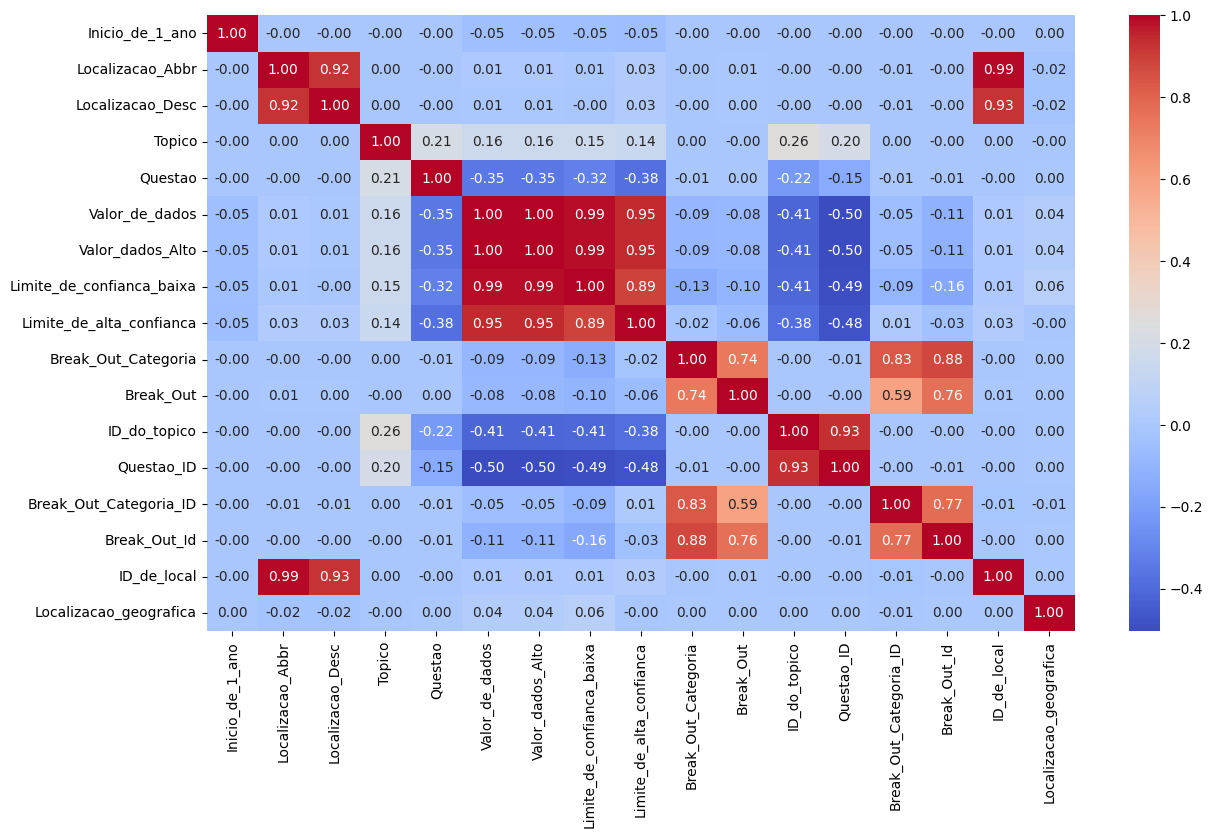

In [48]:
# Criar o heatmap com seaborn
ax = sns.heatmap(df_02.corr(), annot=True, fmt='.2f', cmap='coolwarm')

# Ajustar o tamanho da figura
ax.figure.set_size_inches(14, 8)

<ipython-input-49-3096838932e7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_02.Limite_de_alta_confianca,kde=True)


Text(0.5, 0, 'Questao_ID')

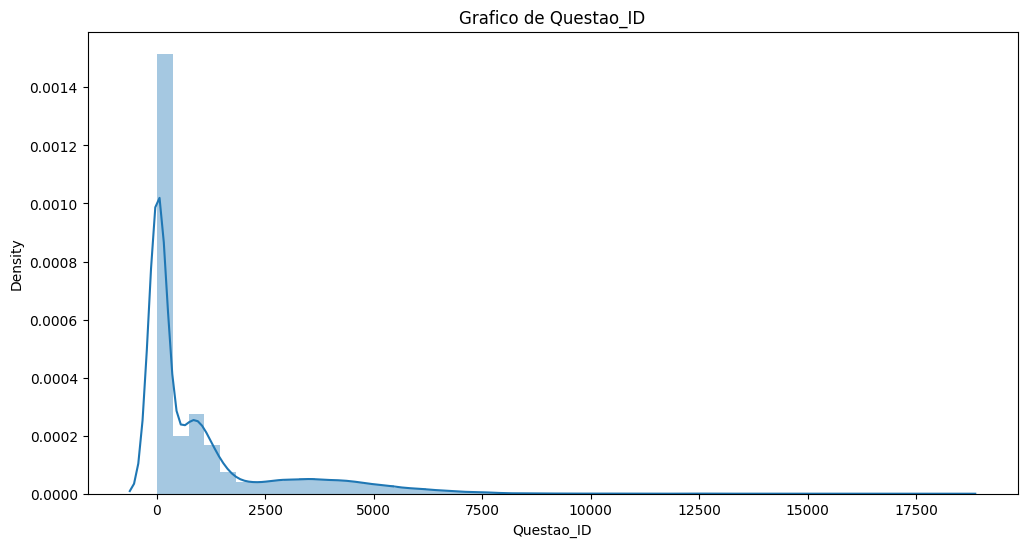

In [49]:
# distribuição de frequencia do objetivo principal

ax = sns.distplot(df_02.Limite_de_alta_confianca,kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title(f'Grafico de {df_02.columns[12]}')
ax.set_xlabel(f'{df_02.columns[12]}')

In [50]:
df_02.columns[12]

'Questao_ID'

In [51]:
cols_continuas = ['Inicio_de_1_ano','Valor_de_dados','Valor_dados_Alto','Limite_de_confianca_baixa','Limite_de_alta_confianca']
cols_categorica =['Localizacao_Abbr', 'Localizacao_Desc', 'Topico', 'Questao', 'Break_Out_Categoria', 'Break_Out', 'ID_do_topico',  'Break_Out_Categoria_ID', 'Break_Out_Id', 'ID_de_local', 'Localizacao_geografica']

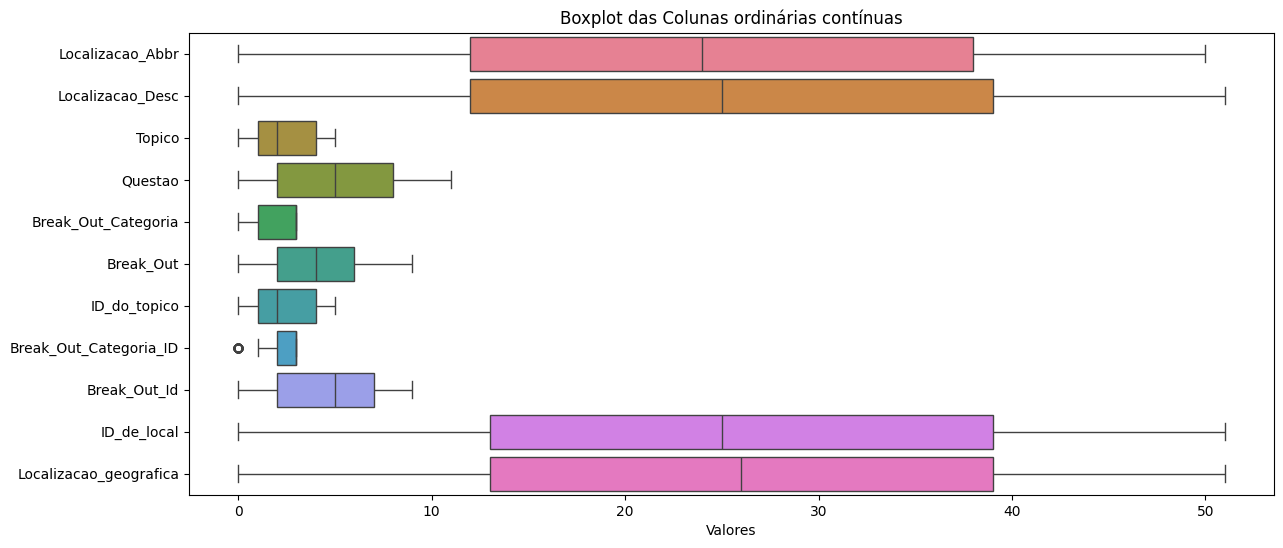

In [52]:
# Defina o tamanho global da figura
plt.figure(figsize=(14, 6))

# Crie o boxplot horizontal para todas as colunas
ax = sns.boxplot(data=df_02[cols_categorica], orient='h')

# Configure o título e os rótulos dos eixos
ax.set_title('Boxplot das Colunas ordinárias contínuas')
ax.set_xlabel('Valores')

# Exiba a figura
plt.show()

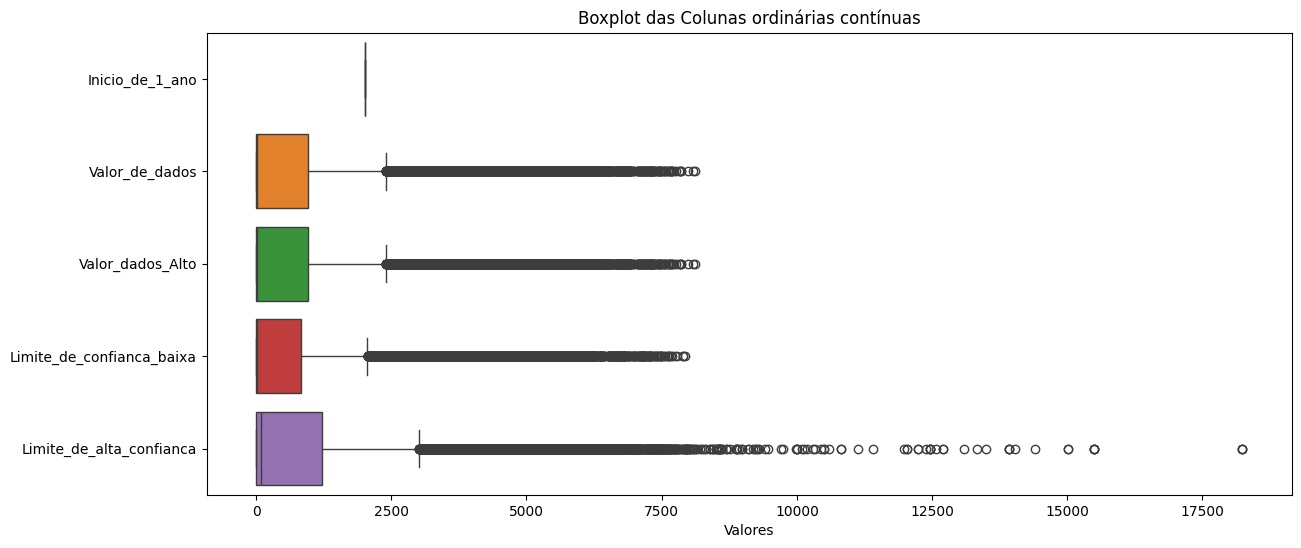

In [53]:
# Defina o tamanho global da figura
plt.figure(figsize=(14, 6))

# Crie o boxplot horizontal para todas as colunas
ax = sns.boxplot(data=df_02[cols_continuas], orient='h')

# Configure o título e os rótulos dos eixos
ax.set_title('Boxplot das Colunas ordinárias contínuas')
ax.set_xlabel('Valores')

# Exiba a figura
plt.show()

In [54]:
df.Topico.unique()

array(['Major Cardiovascular Disease',
       'Diseases of the Heart (Heart Disease)', 'Stroke', 'Heart Failure',
       'Acute Myocardial Infarction (Heart Attack)',
       'Coronary Heart Disease'], dtype=object)

<ipython-input-55-698f0c0f7249>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.Topico.unique(), fontsize=12)    # Configurando o label de cada categoria do eixo Y


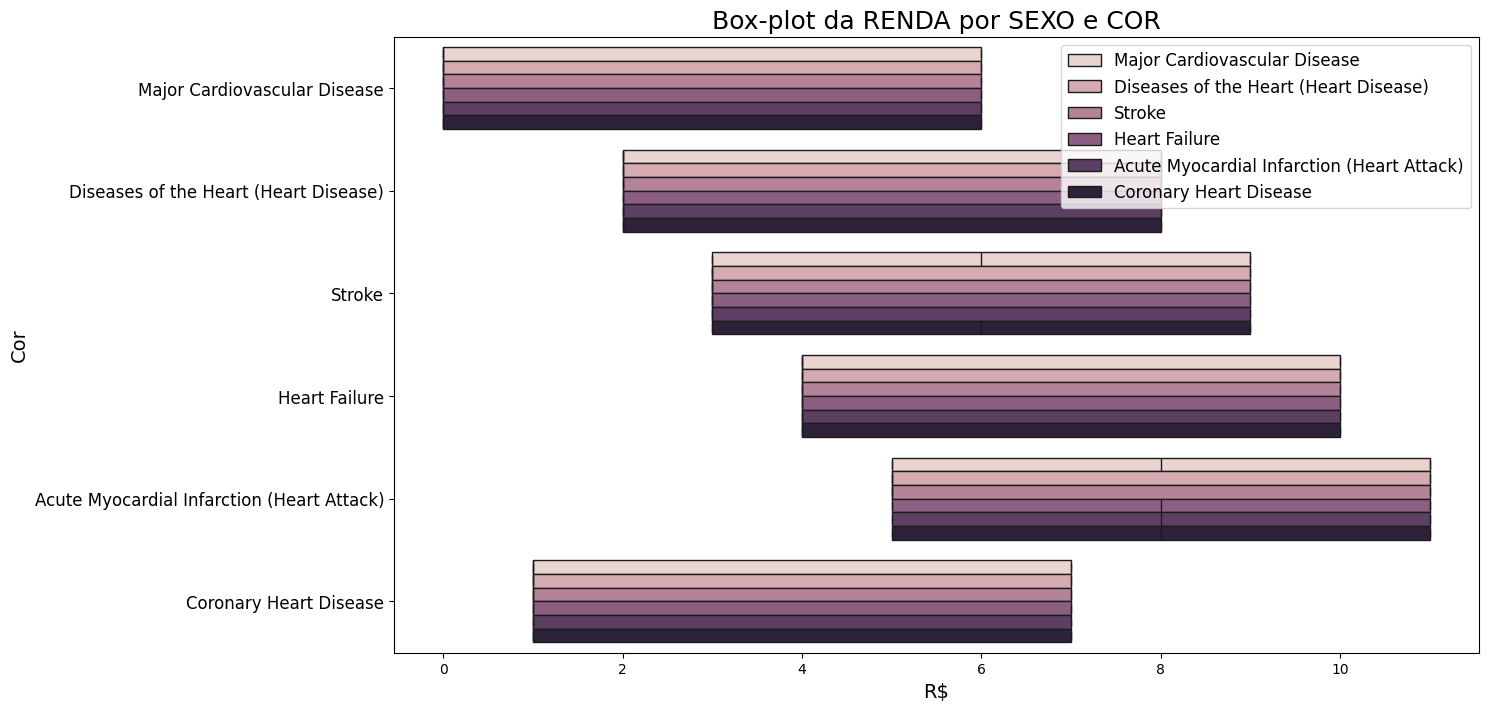

In [55]:
ax = sns.boxplot(x = 'Questao', y = 'Topico', hue = 'Inicio_de_1_ano', data=df_02, orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(df.Topico.unique(), fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, df.Topico.unique(), fontsize=12)

In [61]:
# valores de entradas

features = [
    'Inicio_de_1_ano', 'Localizacao_Abbr', 'Localizacao_Desc', 'Topico',
        'Valor_de_dados', 'Valor_dados_Alto',
       'Limite_de_confianca_baixa', 'Limite_de_alta_confianca',
       'Break_Out_Categoria', 'Break_Out', 'ID_do_topico',
       'Break_Out_Categoria_ID', 'Break_Out_Id', 'ID_de_local',

]

# valores de saída
target = 'Questao_ID'

In [62]:
# excluindo valores vazios
df_02 = df_02.dropna(subset=features + [target])


In [ ]:
# tratando colunas categóricas
# df_encoded = pd.get_dummies(df_02[features])

In [66]:
X = df_02[features]
y = df_02[target]

In [69]:
# Normalizando as colunas de entrada
# Normalizando os dados

scaler = MinMaxScaler()
X_normalizando = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizando, df[target], test_size=0.2, random_state=42)


In [72]:
# Floresta Aleatória

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9889403676580482
              precision    recall  f1-score   support

       MD101       1.00      1.00      1.00       558
       MD103       1.00      1.00      1.00       589
       MD201       1.00      1.00      1.00       566
       MD203       1.00      1.00      1.00       548
       MD301       1.00      0.99      0.99       578
       MD303       0.99      1.00      0.99       525
       MD401       0.99      0.99      0.99       574
       MD403       0.99      0.99      0.99       547
       MD501       0.97      0.94      0.96       572
       MD503       0.93      0.97      0.95       511
       MD601       1.00      0.99      1.00       563
       MD603       0.99      1.00      1.00       560

    accuracy                           0.99      6691
   macro avg       0.99      0.99      0.99      6691
weighted avg       0.99      0.99      0.99      6691



In [73]:
# Treinamento do modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)

# Avaliação do modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9866985502914363
              precision    recall  f1-score   support

       MD101       1.00      1.00      1.00       558
       MD103       1.00      1.00      1.00       589
       MD201       1.00      1.00      1.00       566
       MD203       1.00      1.00      1.00       548
       MD301       0.99      0.99      0.99       578
       MD303       0.99      0.99      0.99       525
       MD401       0.98      0.99      0.98       574
       MD403       0.99      0.97      0.98       547
       MD501       0.96      0.95      0.96       572
       MD503       0.95      0.95      0.95       511
       MD601       0.99      0.99      0.99       563
       MD603       0.99      0.99      0.99       560

    accuracy                           0.99      6691
   macro avg       0.99      0.99      0.99      6691
weighted avg       0.99      0.99      0.99      6691



In [74]:
# treinamento do modelo regressão logistica
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.975190554476162
              precision    recall  f1-score   support

       MD101       1.00      1.00      1.00       558
       MD103       1.00      1.00      1.00       589
       MD201       1.00      1.00      1.00       566
       MD203       1.00      1.00      1.00       548
       MD301       1.00      0.97      0.99       578
       MD303       0.97      1.00      0.98       525
       MD401       1.00      0.98      0.99       574
       MD403       0.98      1.00      0.99       547
       MD501       0.93      0.84      0.88       572
       MD503       0.84      0.93      0.88       511
       MD601       1.00      0.99      0.99       563
       MD603       0.99      1.00      0.99       560

    accuracy                           0.98      6691
   macro avg       0.97      0.98      0.97      6691
weighted avg       0.98      0.98      0.98      6691



In [75]:
# Redes Neurais (Neural Networks)

# Inicializar o modelo
model = MLPClassifier(random_state=42, max_iter=1000)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9858018233447915
              precision    recall  f1-score   support

       MD101       1.00      1.00      1.00       558
       MD103       1.00      1.00      1.00       589
       MD201       1.00      1.00      1.00       566
       MD203       1.00      1.00      1.00       548
       MD301       1.00      0.98      0.99       578
       MD303       0.98      1.00      0.99       525
       MD401       1.00      0.98      0.99       574
       MD403       0.98      1.00      0.99       547
       MD501       0.98      0.90      0.94       572
       MD503       0.90      0.97      0.94       511
       MD601       1.00      0.99      1.00       563
       MD603       0.99      1.00      1.00       560

    accuracy                           0.99      6691
   macro avg       0.99      0.99      0.99      6691
weighted avg       0.99      0.99      0.99      6691



In [76]:
# Gradient Boosting
# Gradient Boosting cria um modelo forte a partir de vários modelos fracos, geralmente árvores de decisão.


# Inicializar o modelo
model = GradientBoostingClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9886414586758332
              precision    recall  f1-score   support

       MD101       1.00      1.00      1.00       558
       MD103       1.00      1.00      1.00       589
       MD201       1.00      1.00      1.00       566
       MD203       1.00      1.00      1.00       548
       MD301       1.00      0.99      0.99       578
       MD303       0.98      1.00      0.99       525
       MD401       1.00      0.99      0.99       574
       MD403       0.99      1.00      0.99       547
       MD501       0.98      0.92      0.95       572
       MD503       0.92      0.98      0.95       511
       MD601       1.00      0.99      1.00       563
       MD603       0.99      1.00      1.00       560

    accuracy                           0.99      6691
   macro avg       0.99      0.99      0.99      6691
weighted avg       0.99      0.99      0.99      6691



In [77]:
# K-Nearest Neighbors (KNN)
# KNN é um algoritmo simples que classifica novos pontos de dados com base nos k pontos de dados mais próximos no conjunto de treinamento.
from sklearn.neighbors import KNeighborsClassifier

# Inicializar o modelo
model = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8913465849648782
              precision    recall  f1-score   support

       MD101       1.00      1.00      1.00       558
       MD103       1.00      1.00      1.00       589
       MD201       1.00      0.99      1.00       566
       MD203       0.99      1.00      1.00       548
       MD301       0.98      0.92      0.94       578
       MD303       0.91      0.98      0.94       525
       MD401       0.92      0.86      0.89       574
       MD403       0.86      0.92      0.89       547
       MD501       0.57      0.53      0.55       572
       MD503       0.51      0.56      0.53       511
       MD601       0.99      0.95      0.97       563
       MD603       0.95      0.99      0.97       560

    accuracy                           0.89      6691
   macro avg       0.89      0.89      0.89      6691
weighted avg       0.89      0.89      0.89      6691



#**Metricas**

In [78]:

# Funções de métricas
class Metricas:

  def __init__(self,real,previsto):

     self.real = real
     self.previsto = previsto

     # Total
     self._total = len(self.real)

     # Verdadeiros Positivos (VP): São as instâncias que são positivas e que o modelo classificou corretamente como positivas.
     self._VP = np.sum((self.real == 1) & (self.previsto == 1))
     # Verdadeiros Negativos (VN): São as instâncias que são negativas e que o modelo classificou corretamente como negativas.
     self._VN = np.sum((self.real == 0) & (self.previsto == 0))
    # Falsos Positivos (FP): São as instâncias que são negativas, mas que o modelo classificou erroneamente como positivas.
     self._FP = np.sum((self.real == 0) & (self.previsto == 1))
    # Falsos Negativos (FN): São as instâncias que são positivas, mas que o modelo classificou erroneamente como negativas.
     self._FN = np.sum((self.real == 1) & (self.previsto == 0))

  def acuracia(self):
     acuracia = (self._VP + self._VN) / (self._VP + self._VN + self._FP + self._FN)
     return acuracia

  def precisao(self):
    precision = self._VP / (self._VP + self._FP)
    return precision

  def recall(self):
    recall = self._VP / (self._VP + self._FN)
    return recall

  def especificidade(self):
    taxa = self._VN / (self._VN + self._FP)
    return taxa

  def f1_score(self):
    score = 2 * ((self.precisao() * self.recall()) / (self.precisao() + self.recall()))
    return score

  def formatacao(self):
    print(f"Acuracia:.........{self.acuracia() * 100:.2f}%\
    especificidade:...{self.especificidade() * 100:.2f}%\
    recall:...........{self.recall() * 100:.2f}%\
    precisao:.........{self.precisao() * 100:.2f}%\
    f1_score:.........{self.f1_score() * 100:.2f}%")


  @property
  def VP(self):
        # Este código é executado quando alguém for ler o valor de self.nome
        return self._VP
  @property
  def VN(self):
        return self._VN
  @property
  def FP(self):
        return self._FP
  @property
  def FN(self):
        return self._FN

In [79]:
# Gráfico de rosca para métricas

import random


def grafico_rosca(nome_metrica,valor_da_metrica):

  def cor_rgb_aleatoria():
    """Gera uma cor RGB aleatória no formato 'rgb(r, g, b)'."""
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return f'rgb({r},{g},{b})'

  cor_aleatoria = cor_rgb_aleatoria()

  # Valor da acurácia
  valor = valor_da_metrica * 100


  # Calcule o tamanho da "rosca"
  rosca_size = 100 - valor

  # Crie um DataFrame com os dados
  data = {'Categoria': [f'{nome_metrica}', ''],
          'Valor': [valor, rosca_size]}
  df = pd.DataFrame(data)

  # Crie o gráfico de pizza com Plotly Express
  fig = px.pie(df, values='Valor',
              names='Categoria',
              hole=0.7,
              color_discrete_sequence=[f'{cor_aleatoria}', 'lightgray'])


  fig.update_traces(textinfo='none',
                    showlegend=False,
                    #marker=dict(line=dict(color='cor', width=2))
                    )

  fig.update_layout(#title='Acurácia',
                    width=550,
                    height=350,
                    )

  fig.add_annotation(x=0.5, y=1.15, text=f'<b>{nome_metrica}</b>', font=dict(color = cor_aleatoria, size=29, family='Arial, sans-serif'), showarrow=False)
  # Adicione o valor da acurácia no centro
  fig.add_annotation(x=0.5, y=0.5, text=f'<b>{valor:.2f}%</b>',font=dict(color= cor_aleatoria, size=32, family='Arial, sans-serif'),  showarrow=False)

  return fig.show()